In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
# 1-Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from scipy.stats import beta
from scipy.stats import f
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
df=pd.read_csv("/content/data.csv") 

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

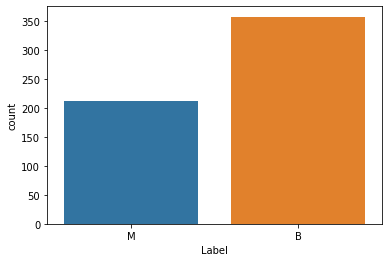

In [ ]:
#seeing the number of M and B with ploting
sns.countplot(x="Label", data=df)


In [ ]:
# label encoding(convert the value of M and B into 1 and 0)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)   #[:,1] means col 1 is being modified

In [ ]:
df.head()

,id,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


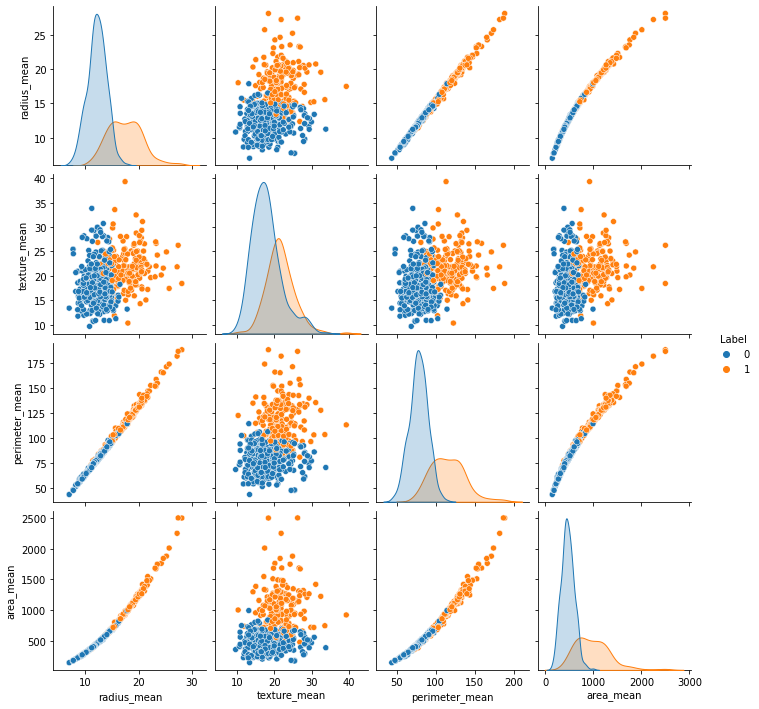

In [ ]:
sns.pairplot(df.iloc[:,1:6],hue="Label")

In [ ]:
#finding corelation between features
df.iloc[:,1:32].corr()
#radius mean is strongly corelated with label (0.73 which is near 1)

,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Label,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


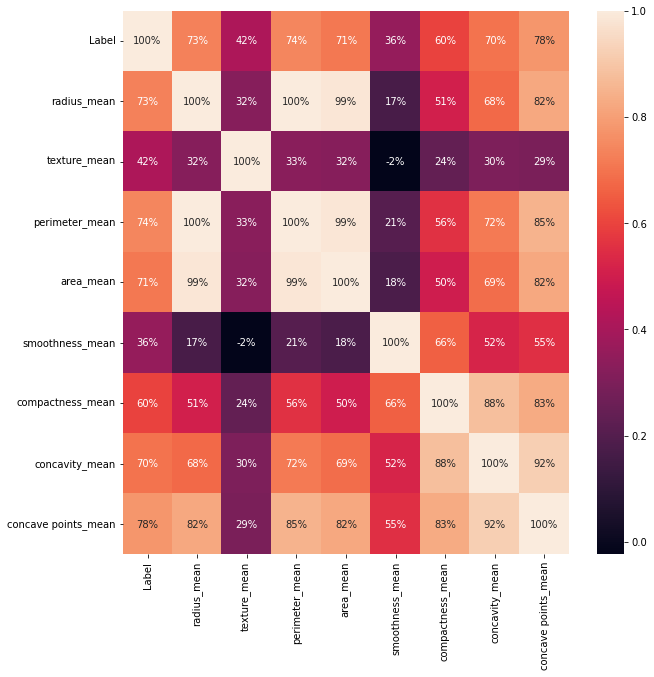

In [ ]:
#showing the corelation in heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(),annot=True,fmt=".0%") #annot: If True, write the data value in each cell. fmt: String formatting code to use when adding annotations.

In [ ]:
#Define x and normalize / scale values                        # M or B 
list = ['Unnamed: 32','id','Label']
X = df.drop(list,axis = 1 ) #Define the independent variables. Drop unnamed, label and ID because no use

print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# New Section

In [ ]:
# split the dataset into dependent(X) and Independent(Y) datasets
X=df.iloc[:,2:32].values #everything except label values
Y=df.iloc[:,1].values #here are all the label values [1 col]

In [ ]:
# spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42) #random test diye i can control the randomness 

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler #StandardScaler removes the mean and scales each feature/variable to unit variance
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

# PCA

<ipython-input-37-7ecb9866d14b>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(x, ["" + str(i) for i in x])


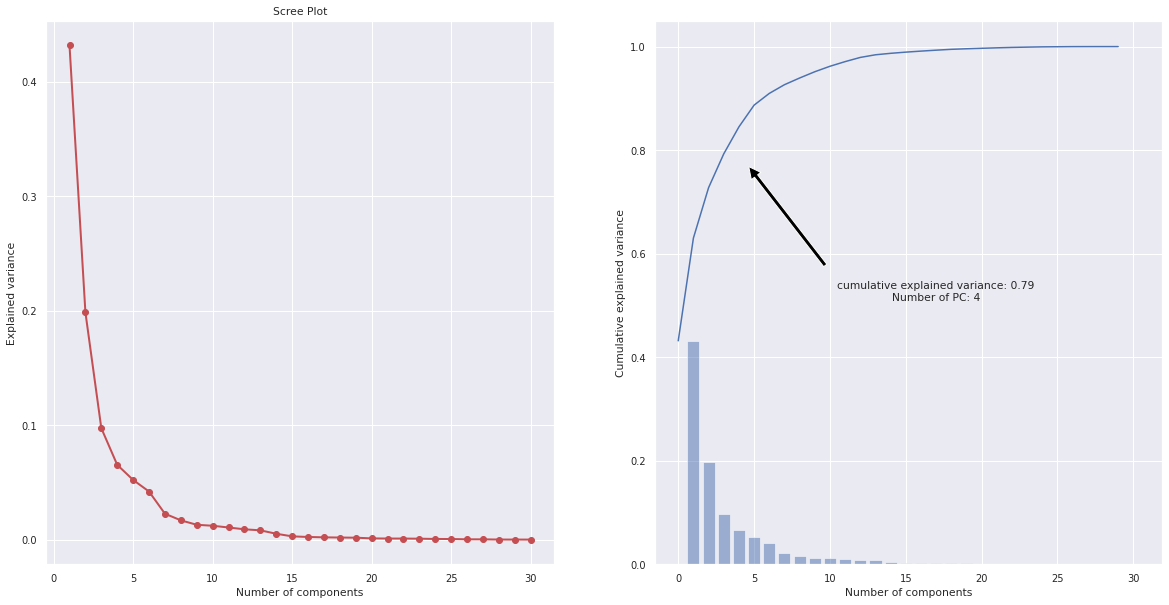

In [ ]:
# Principal component analysis
pca = PCA()
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

# Eigenvalues
Eigen_Values = pca.explained_variance_
ell = pca.explained_variance_ratio_


# Scree plot
plt.subplots(1, 2, figsize = (20, 10))

ax1 = plt.subplot(1, 2, 1)
x = numpy.arange(len(Eigen_Values)) + 1
ax1.plot(x, Eigen_Values / Eigen_Values.sum(), 'ro-', lw=2)
ax1.set_xticks(x, ["" + str(i) for i in x])
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance')
ax1.set_title('Scree Plot')

# Pareto plot
ax2 = plt.subplot(1, 2, 2)
ind = numpy.arange(1, len(ell) + 1)
ax2.bar(ind, ell, align='center', alpha=0.5)
ax2.plot(numpy.cumsum(ell))
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Cumulative explained variance')
#ax1.set_title('Pareto Plot')

for x, y in zip(ind, numpy.cumsum(ell)):
    label = "{:.2f}".format(y)
    if float(label) >= 0.79:
        plt.annotate("cumulative explained variance: " + label + "\n" +
                     "Number of PC: " + str(x),  # this is the text
                     (x, y),  # this is the point to label
                     textcoords='figure fraction',  # how to position the text
                     xytext=(.8, 0.5),  # distance from text to points (x,y)
                     arrowprops=dict(facecolor='black', shrink=0.1),
                     horizontalalignment='left',
                     verticalalignment='bottom',
                     ha='center')  # horizontal alignment can be left, right or center
        NUMBER_OF_PCs = x # for further use
        break

Z_train = Z_train[:, :NUMBER_OF_PCs]
Z_test = Z_test[:, :NUMBER_OF_PCs]

In [ ]:
# models/ Algorithms

def models(X_train,Y_train):
        #logistic regression
        from sklearn.linear_model import LogisticRegression
        log=LogisticRegression(random_state=0)
        log.fit(X_train,Y_train)
        Y_pred=log.predict(X_test)
        
        #Random Forest
        from sklearn.ensemble import RandomForestClassifier
        forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
        forest.fit(X_train,Y_train)
        
        #print('[0]logistic regression accuracy:',log.score(X_train,Y_train))
        #print('[1]Random forest accuracy:',forest.score(X_train,Y_train))
        
        return log,forest

In [ ]:
model=models(X_train,Y_train)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print('Accuracy : ',accuracy_score(Y_test,model[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy :  0.9766081871345029
Model 1
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy :  0.9590643274853801


# Accuracy precision and f1 

In [ ]:
#Predicting Test set
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)
Y_pred=log.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(Y_test,Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test,Y_pred)
results = pd.DataFrame([['Logistic Regression ', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.976608,0.983607,0.952381,0.967742


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,Y_train)
Y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(Y_test,Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test,Y_pred)
results1 = pd.DataFrame([['Random Forest ', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results1

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.97076,0.983333,0.936508,0.95935


In [ ]:
# prediction of random-forest
pred=model[1].predict(X_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(Y_test)

Predicted values:
[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Actual values:
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [ ]:
#checking rmse   #might delete this
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)
Y_pred=log.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = numpy.sqrt(mse)
print("RMSE: ", numpy.round(rmse, 2))

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
forest.fit(X_train,Y_train)
Y_pred=forest.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = numpy.sqrt(mse)
print("RMSE: ", numpy.round(rmse, 2))



RMSE:  0.15
RMSE:  0.2


In [ ]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

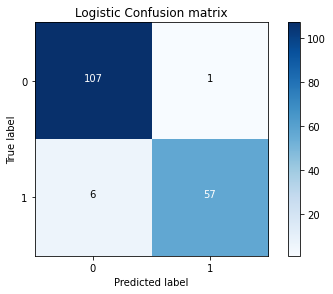

Accuracy  =     0.959
Precision =     0.983
Recall    =     0.905
F1_score  =     0.942


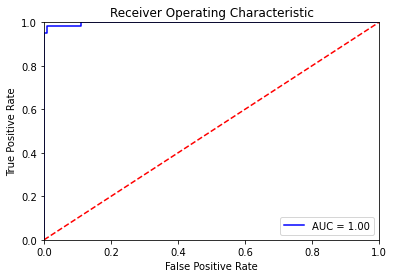

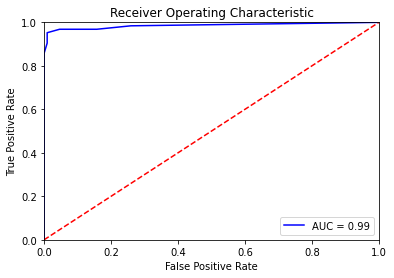

In [ ]:
# Confusion maxtrix & metrics
cm = confusion_matrix(Y_test, Y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn import datasets, metrics, model_selection, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
def plot_roc(model, X_test, Y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(numpy.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc(log, X_test, Y_test)
plot_roc(forest, X_test, Y_test)

In [ ]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= LogisticRegression(), X=X_train, y=Y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Accuracy: 0.975 (+/- 0.046)


# ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras import regularizers

In [ ]:
model1 = Sequential()
model1.add(Dense(16, input_dim=30, activation='relu')) 
model1.add(Dropout(0.2))
model1.add(Dense(1)) 
model1.add(Activation('sigmoid')) 
 
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Fit with no early stopping or other callbacks
history = model1.fit(X_train, Y_train, verbose=1, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
7/7 [==============================] - 2s 88ms/step - loss: 0.8319 - accuracy: 0.4849 - val_loss: 0.7050 - val_accuracy: 0.5965
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6883 - accuracy: 0.5678 - val_loss: 0.6006 - val_accuracy: 0.7076
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6058 - accuracy: 0.6683 - val_loss: 0.5181 - val_accuracy: 0.8012
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5326 - accuracy: 0.7387 - val_loss: 0.4524 - val_accuracy: 0.8596
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4700 - accuracy: 0.7688 - val_loss: 0.4006 - val_accuracy: 0.8772
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.4099 - accuracy: 0.8241 - val_loss: 0.3599 - val_accuracy: 0.8889
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3893 - accuracy: 0.8317 - val_loss: 0.3278 - val_accuracy: 0.8947
Epoch 8/100
7/7 [===

In [ ]:
# Accuracy
test_loss, test_acc = model1.evaluate(X_test, Y_test)
test_acc

6/6 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9942


0.9941520690917969

6/6 [==============================] - 0s 4ms/step
accuracy: 0.9941520690917969 
precison: 1.0 
recall: 0.06349 
f1-measure: 0.1194


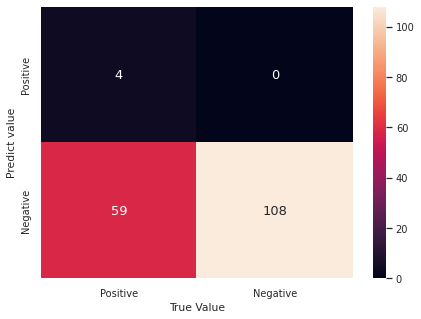

In [ ]:
def evaluation(p,y):
    matrix=numpy.zeros((2,2))
    for i in range(len(y)):
      matrix[numpy.round(int(p[i])) ] [y[i]]+=1
    #True+, True-, False+, False-    
    tp,tn,fp,fn=matrix[1,1], matrix[0,0], matrix[1,0], matrix[0,1]
    accuracy=round( (tp+tn)/ (tp+tn+fn+fp),5)
    precision= round(tp/ (tp+fp),5)
    recall= round(tp/(tp+fn),5)
    f_mea= round(2*precision*recall/ (precision+recall),5)
    return accuracy,tp,tn,fp,fn, precision, recall, f_mea
def the_result(result):
    print("accuracy:",test_acc,"\nprecison:",result[5],"\nrecall:",result[6],"\nf1-measure:",result[7])
def Visualized_matrix(result):
  plt.figure(figsize=(7,5))
  sns.set(font_scale=0.9)
  res=[ [result[1],result[3]] , [result[4],result[2]] ]
  ax=sns.heatmap(res,annot=True, annot_kws={"size": 13},fmt='g',
  xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative']) 
  ax.set(xlabel='True Value',ylabel='Predict value') 


pred_ann=model1.predict(X_test)
result1=evaluation(pred_ann,Y_test)
#print(result)
the_result(result1)
Visualized_matrix(result1)

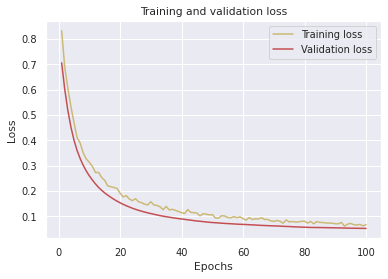

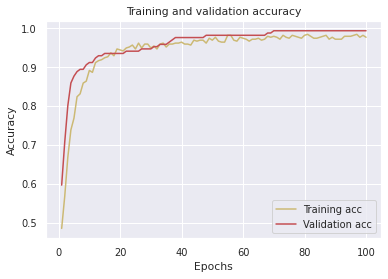

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=NUMBER_OF_PCs))
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier_ann = KerasClassifier(build_fn=build_classifier, batch_size=16, epochs=100, verbose=0)
accuracies = cross_val_score(estimator=classifier_ann, X=Z_train, y=Y_train, cv=10)
ann_score = accuracies.mean()
#print("ann_score",ann_score)
ann_std = accuracies.std()
print("ann_std",ann_std)

classifier_ann.fit(Z_train, Y_train)
ann_test_score = classifier_ann.score(Z_test, Y_test)
print("ann_test_score",ann_test_score)
print(classification_report(Y_test,classifier_ann.predict(Z_test)))

<ipython-input-35-a3a22158d9db>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_ann = KerasClassifier(build_fn=build_classifier, batch_size=16, epochs=100, verbose=0)


ann_score 0.9622435927391052
ann_std 0.023193174538719066
ann_test_score 0.9766082167625427
6/6 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



accuracy: 0.96491 
precison: 0.98305 
recall: 0.92063 
f-measure: 0.95082


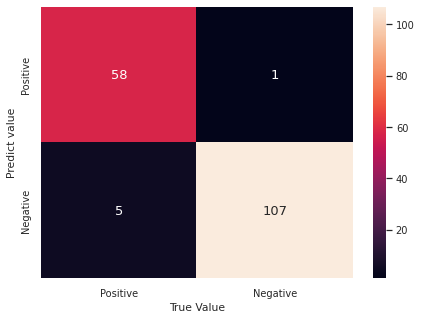

In [ ]:
#KNN
def evaluation(p,y):
    matrix=numpy.zeros((2,2))
    for i in range(len(y)):
        matrix[ round(p[i]) ] [y[i]]+=1
    #True+, True-, False+, False-    
    tp,tn,fp,fn=matrix[1,1], matrix[0,0], matrix[1,0], matrix[0,1]
    accuracy=round( (tp+tn)/ (tp+tn+fn+fp),5)
    precision= round(tp/ (tp+fp),5)
    recall= round(tp/(tp+fn),5)
    f_mea= round(2*precision*recall/ (precision+recall),5)
    return accuracy,tp,tn,fp,fn, precision, recall, f_mea
def the_result(result):
    print("accuracy:",result[0],"\nprecison:",result[5],"\nrecall:",result[6],"\nf-measure:",result[7])
def Visualized_matrix(result):
  plt.figure(figsize=(7,5))
  sns.set(font_scale=0.9)
  res=[ [result[1],result[3]] , [result[4],result[2]] ]
  ax=sns.heatmap(res,annot=True, annot_kws={"size": 13},fmt='g',
  xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative']) 
  ax.set(xlabel='True Value',ylabel='Predict value') 


  
from sklearn.neighbors import KNeighborsClassifier
model_k= KNeighborsClassifier(n_neighbors=8)
model_k=model_k.fit(X_train,Y_train)
pred_k=model_k.predict(X_test)
result=evaluation(pred_k,Y_test)
#print(result)
the_result(result)
Visualized_matrix(result)
